# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machinelearning.https://en.wikipedia.org/wiki/Iris_flower_data_set

There are 4 features: sepal length, sepal width, petal length, and petal width.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [14]:
# Load the data
data = pd.read_csv('iris_dataset.csv')
# Check the data
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Plot the data

try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

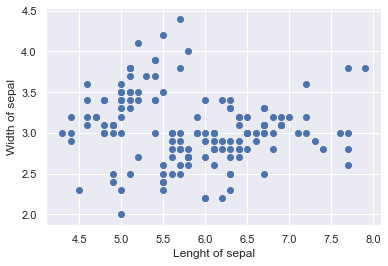

In [15]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(data['sepal_length'],data['sepal_width'])
# name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## Clustering (unscaled data)

In [16]:
# create a variable which will contain the data for the clustering
x = data.copy()
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
# create a copy of data, so we can see the clusters next to the original data
clusters = data.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

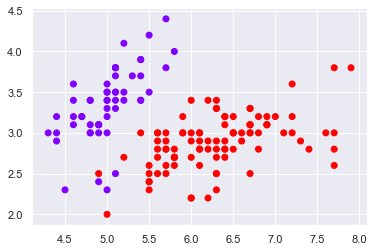

In [18]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')

## Standardize the variables

In [19]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(data)

## Clustering (scaled data)

In [20]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

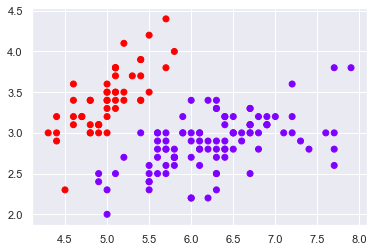

In [22]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

Looks like the two solutions are identical. That is because the original features have very similar scales to start with.

## Take Advantage of the Elbow Method

### WCSS

In [23]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.57790500611007,
 91.13730688271085,
 80.53520939466802,
 71.31982095188795,
 63.056244057155496,
 55.63991395074483]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

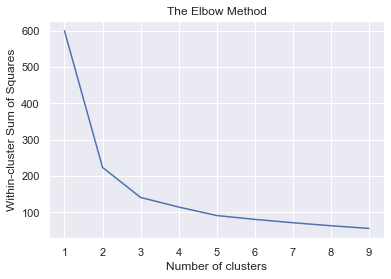

In [24]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Understanding the Elbow Curve

Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 2 clusters

In [40]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'Sepal Width')

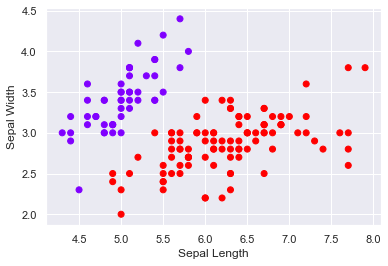

In [41]:
clusters_2=x.copy()
clusters_2['cluster_pred'] = kmeans_2.fit_predict(x_scaled)
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'],
           c=clusters_2['cluster_pred'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

## 3 clusters

In [42]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'Sepal Width')

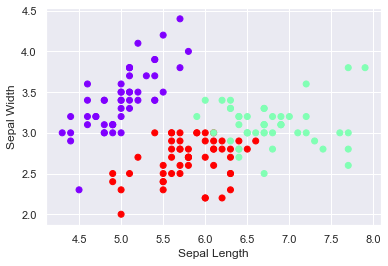

In [43]:
clusters_3=x.copy()
clusters_3['cluster_pred'] = kmeans_3.fit_predict(x_scaled)
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'],
           c=clusters_3['cluster_pred'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

## 5 clusters

In [44]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'Sepal Width')

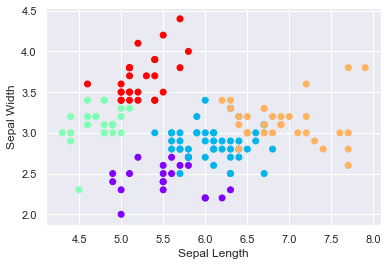

In [45]:
clusters_5=x.copy()
clusters_5['cluster_pred'] = kmeans_5.fit_predict(x_scaled)

plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'],
           c=clusters_5['cluster_pred'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

## Compare solutions to the original iris dataset

There are only 3 types, because that's the original (truthful) iris dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [48]:
data_original = pd.read_csv('iris_with_answers.csv')
data_original.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


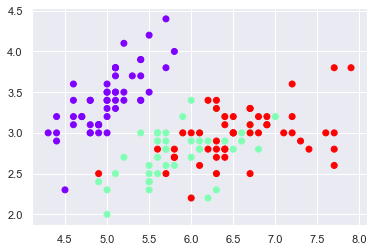

In [49]:
data_mapped = data_original.copy()
data_mapped['species'] = data_mapped['species'].map({'setosa':0,
                                                    'versicolor':1,
                                                    'virginica':2})

plt.scatter(data_mapped['sepal_length'],data_mapped['sepal_width'],
           c=data_mapped['species'], cmap='rainbow')

## Scatter plot of Petal

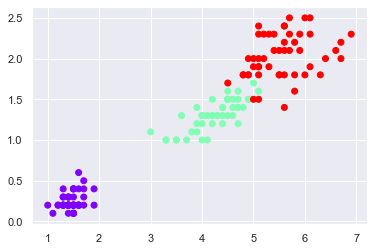

In [50]:
plt.scatter(data_mapped['petal_length'],data_mapped['petal_width'],
           c=data_mapped['species'],cmap='rainbow')

It seems that in fact the features which actually make the species differetnt are **petals** not sepals.

### Plot of Petal with 3 clusters

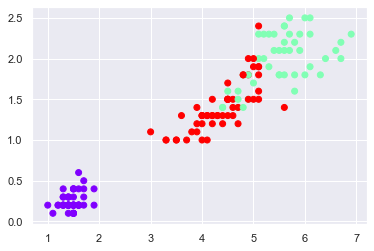

In [52]:
plt.scatter(clusters_3['petal_length'],clusters_3['petal_width'],
           c=clusters_3['cluster_pred'],cmap='rainbow')

The original dataset has 3 sub-species of the Iris flower. Therefore, the number of clusters is 3.